### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc, fftpack
import cv2
%matplotlib inline

trappedcat = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg') #read image
w,h = (len(trappedcat),len(trappedcat[0])) # get image dimension

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


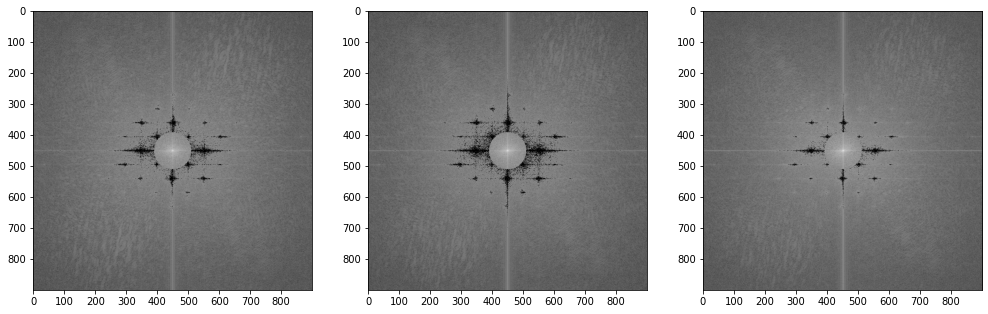

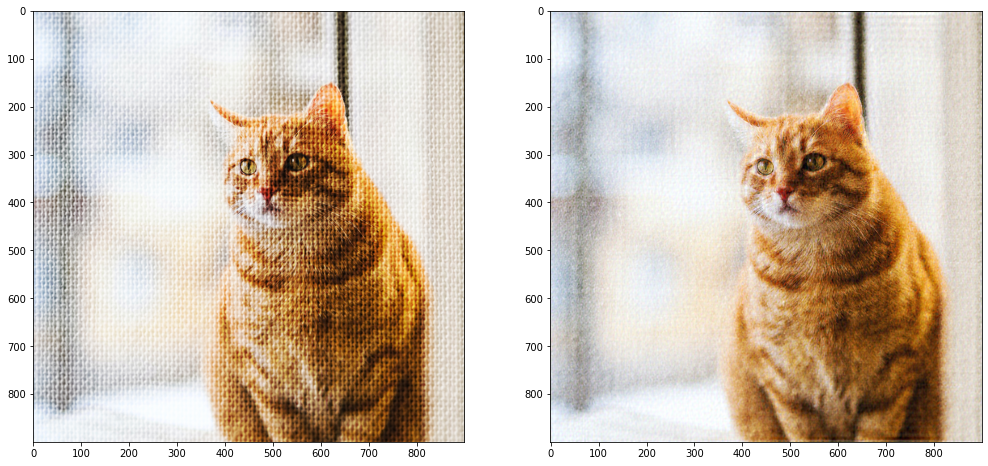

In [5]:
r = 60 #radius around the low frequency data in fourier space
threshold = 0.55 #threshold for what qualifies as a 'data peak' in fourier space
rgbcat = []
rgbmask = []
for i in range(3): #for rgb
    fourier = fftpack.fftshift(fftpack.fft2((trappedcat[:, :, i]))) #fourier transform the image
    
    abs_fourier = (np.abs(fourier))**0.0001 #part of the normalising process
    
    mask = cv2.normalize(abs_fourier, None, 0, 1, cv2.NORM_MINMAX) #normalise the data in fourier space, credit:P Vicky
    mask = cv2.threshold(mask, threshold, 1, cv2.THRESH_BINARY)[1] #mask created at each data peaks, credit:P Vicky

    for y in range(w):
        for x in range(h):
            if (x-w/2)**2 + (y-h/2)**2 < r**2:
                mask[x][y] = 0


    fourier[mask != 0] = 1 #masking over the fourier of image
    masked_fourier = (np.abs(fourier))**0.0001
    rgbmask.append(masked_fourier)
    
    rgbcat.append(abs(fftpack.ifft2(fourier)))

cat = np.dstack([rgbcat[0]/255,rgbcat[1]/255,rgbcat[2]/255]) #combine RGB

fig1, ax1 = plt.subplots(1, 3, figsize=(17,12))
ax1[0].imshow(rgbmask[0],cmap = 'gray')
ax1[1].imshow(rgbmask[1],cmap = 'gray')
ax1[2].imshow(rgbmask[2],cmap = 'gray')
fig2, ax2 = plt.subplots(1, 2, figsize=(17,12))
ax2[0].imshow(trappedcat)
ax2[1].imshow(cat)

    